In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, segmentation, color, feature,filters
from  skimage import graph
from skimage.segmentation import mark_boundaries
import networkx as nx


c:\ProgramData\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
# Path to the directory containing the frames
directory = 'E:/ASEB/3rd Year/Maths/End Sem Final/extracted_frames/test_extracted/1'

# Initialize an empty list to store the frames
frames = []

# Iterate over the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith("00888.png"): 
        # Construct the full path to the frame
        frame_path = os.path.join(directory, filename)
        # Read the frame and append it to the list
        frame = cv2.imread(frame_path)
        frames.append(frame)
    else:
        continue
    
print(len(frames))


1


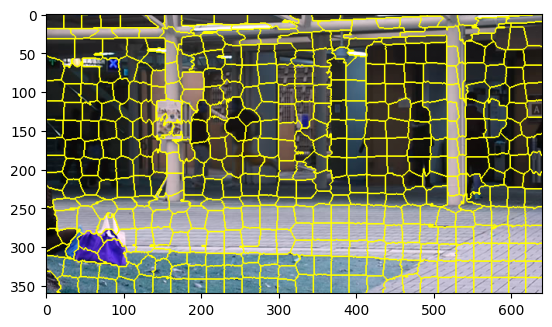

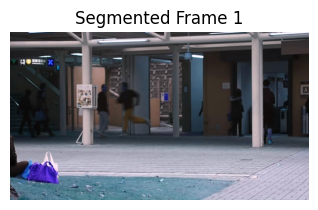

In [4]:
# Image segmentation using Normalized Cuts (MRF-based)
segmented_frames = []

for frame in frames:
    # Convert the frame to a 2D array
    image_2d = color.rgb2gray(frame)

    # Create a graph-based image representation
    labels = segmentation.slic(frame, compactness=30, n_segments=450)
    g = graph.rag_mean_color(frame, labels)

    # Apply Normalized Cuts algorithm to segment the image
    cut_mask = graph.cut_normalized(labels, g)

    # Modify the mask to create a binary mask for the segmented region
    mask = np.asarray(cut_mask, dtype=np.uint8)

    # Apply the mask to the original frame
    segmented_frame = frame * mask[:, :, np.newaxis]
    plt.imshow(mark_boundaries(frame, labels))  # Use the mark_boundaries function to print the Slic segments
    plt.show()
    segmented_frames.append(segmented_frame)
    cv2.imwrite(f"E:/ASEB/3rd Year/Maths/End Sem Final/extracted_frames/image_{len(segmented_frames)}.png", cv2.cvtColor(segmented_frame, cv2.COLOR_BGR2RGB))

# Visualize the segmented frames
for i, segmented_frame in enumerate(segmented_frames):
    plt.subplot(2, len(segmented_frames), i + 1)
    plt.imshow(segmented_frame)
    plt.axis('off')
    plt.title(f'Segmented Frame {i + 1}')

plt.show()